In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def draw(A: list[list[float]]):
    G = nx.from_numpy_array(np.array(A), parallel_edges=False, create_using=nx.DiGraph())
    
    pos=nx.drawing.shell_layout(G)

    nx.draw(G, pos, 
        with_labels=True, 
        node_color='lightblue', 
        node_size=500, 
        font_size=12
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    labels = {node: str(node) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    plt.axis('off')
    plt.tight_layout()
    plt.show()


Алгоритм Форда-Фалкерсона

C:\Users\User\AppData\Local\Temp\ipykernel_12312\4250288652.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


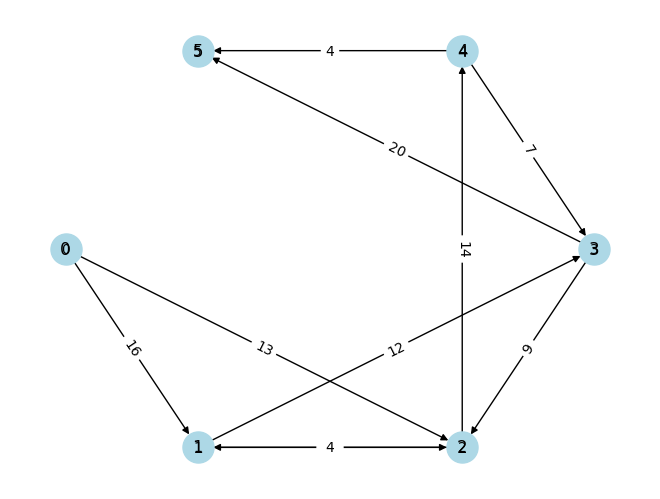

12


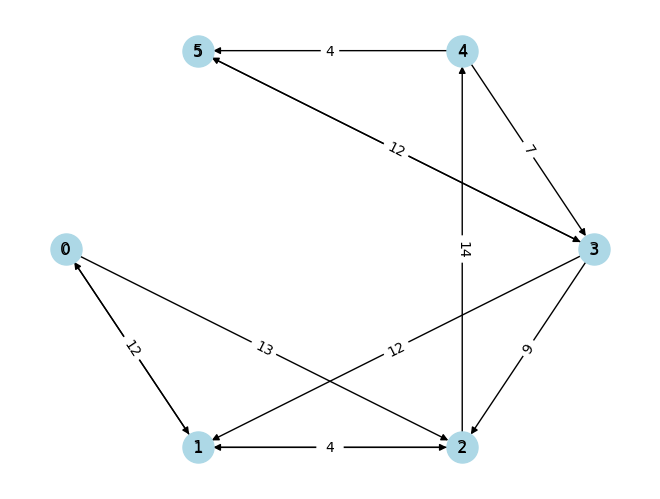

4


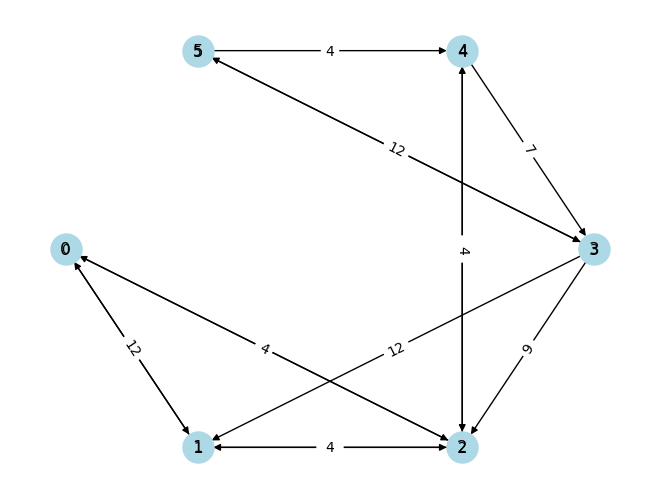

7


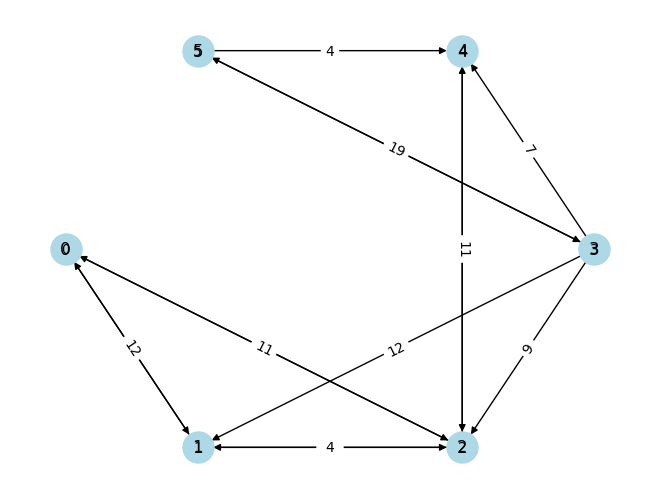

The maximum possible flow is 23 


In [36]:
# This class represents a directed graph 
# using adjacency matrix representation
class Graph:
 
    def __init__(self, graph):
        self.graph = graph  # residual graph
        self.ROW = len(graph)
        # self.COL = len(gr[0])
 
    '''Returns true if there is a path from source 's' to sink 't' in
    residual graph. Also fills parent[] to store the path '''
 
    def BFS(self, s, t, parent):
 
        # Mark all the vertices as not visited
        visited = [False]*(self.ROW)
 
        # Create a queue for BFS
        queue = []
 
        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True
 
         # Standard BFS Loop
        while queue:
 
            # Dequeue a vertex from queue and print it
            u = queue.pop(0)
 
            # Get all adjacent vertices of the dequeued vertex u
            # If a adjacent has not been visited, then mark it
            # visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                      # If we find a connection to the sink node, 
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True
 
        # We didn't reach sink in BFS starting 
        # from source, so return false
        return False
             
     
    # Returns the maximum flow from s to t in the given graph
    def FordFulkerson(self, source, sink):
 
        # This array is filled by BFS and to store path
        parent = [-1]*(self.ROW)
 
        max_flow = 0 # There is no flow initially
 
        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :
 
            # Find minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while(s !=  source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]
 
            # Add path flow to overall flow
            max_flow += path_flow
 
            # update residual capacities of the edges and reverse edges
            # along the path
            v = sink
            while(v !=  source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
            print(path_flow)
            draw(self.graph)
            
        return max_flow
 
  
# Create a graph given in the above diagram
 
graph = [[0, 16, 13, 0, 0, 0],
        [0, 0, 10, 12, 0, 0],
        [0, 4, 0, 0, 14, 0],
        [0, 0, 9, 0, 0, 20],
        [0, 0, 0, 7, 0, 4],
        [0, 0, 0, 0, 0, 0]]
 
g = Graph(graph)
draw(graph)
source = 0; sink = 5
  
print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink))
 
# This code is contributed by Neelam Yadav